In [1]:
import os

import pandas as pd
from dotenv import load_dotenv
from sqlalchemy import create_engine
import altair as alt

In [2]:
alt.renderers.enable("mimetype");

In [3]:
load_dotenv()

connection_string = "postgresql://{user}:{password}@{host}:{port}/{db}".format(
    user=os.getenv('DB_USER'),
    password=os.getenv('DB_PASSWORD'),
    host=os.getenv('DB_HOST'),
    port=os.getenv('DB_PORT'),
    db=os.getenv('DB_NAME')
)
engine = create_engine(connection_string)

### Launches

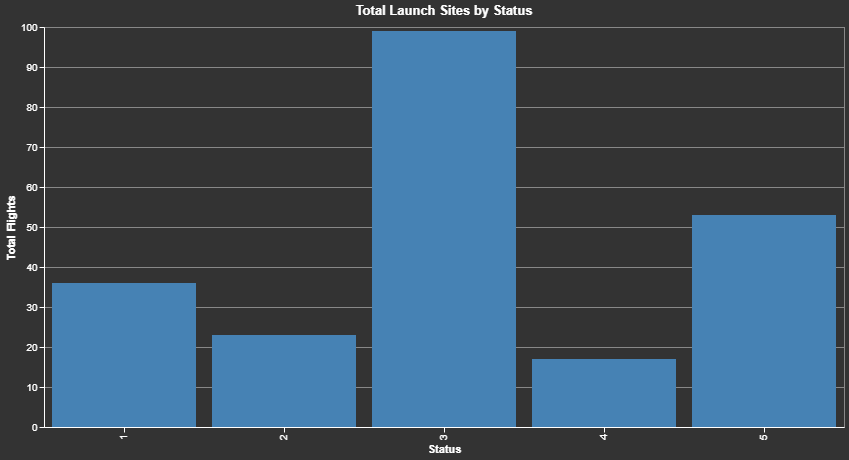

In [4]:
query = """
SELECT
    flying_status,
    COUNT(*) AS count
FROM source.launches
GROUP BY flying_status
"""
df = pd.read_sql(query, engine)
barchart = alt.Chart(df).mark_bar(color='steelblue').encode(
    x=alt.X('flying_status:N', title='Status'),
    y=alt.Y('count:Q', title='Total Flights'),
    tooltip=['flying_status:N', 'count:Q']
).properties(
    width=800,
    height=400,
    title='Total Launch Sites by Status'
)
barchart.show()
# 1 Oficiální (placené)
# 2 Oficiální (neplacené)
# 3 Tolerováno
# 4 Zakázáno
# 5 Neuvedeno

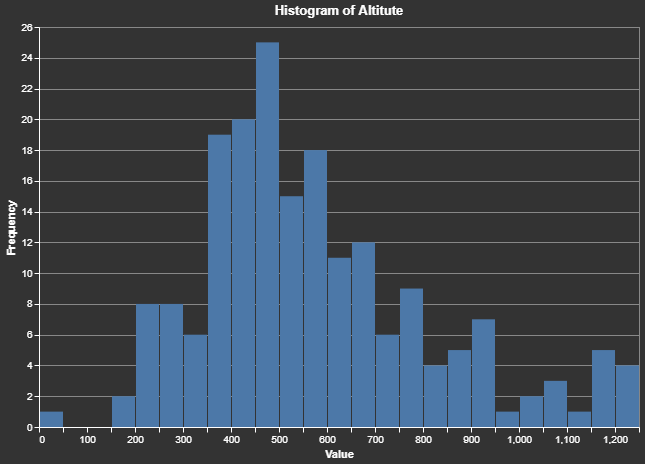

In [5]:
query = """
SELECT
    name,
    altitude,
    superelevation
FROM source.launches
WHERE active
"""
launches = pd.read_sql(query, engine)
histogram = alt.Chart(launches).mark_bar().encode(
    alt.X('altitude:Q', bin=alt.Bin(maxbins=30), title='Value'),
    alt.Y('count()', title='Frequency')
).properties(
    width=600,
    height=400,
    title='Histogram of Altitute'
)
alt.data_transformers.disable_max_rows()
histogram.show()

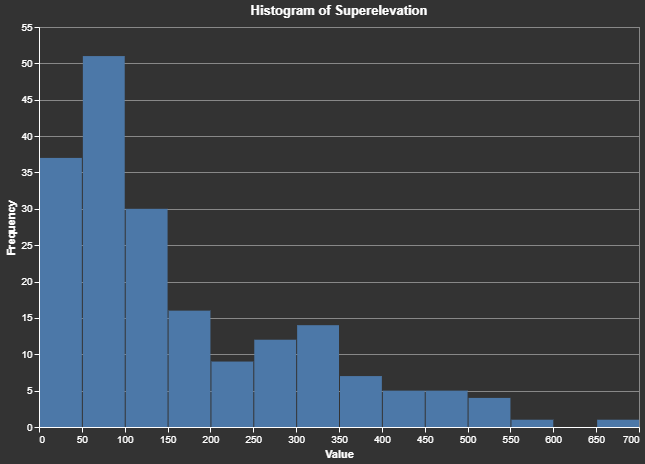

In [6]:
launches = pd.read_sql(query, engine)
histogram = alt.Chart(launches).mark_bar().encode(
    alt.X('superelevation:Q', bin=alt.Bin(maxbins=30), title='Value'),
    alt.Y('count()', title='Frequency')
).properties(
    width=600,
    height=400,
    title='Histogram of Superelevation'
)
alt.data_transformers.disable_max_rows()
histogram.show()

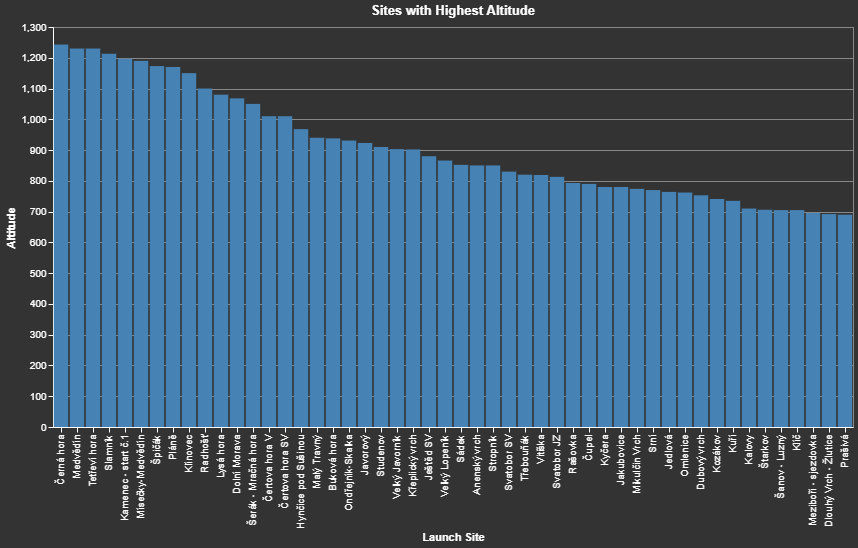

In [7]:
query = """
SELECT
    name,
    altitude
FROM source.launches
WHERE active
ORDER BY altitude DESC
LIMIT 50
"""
df = pd.read_sql(query, engine)
barchart = alt.Chart(df).mark_bar(color='steelblue').encode(
    x=alt.X('name:N', sort=alt.EncodingSortField(field='altitude', order='descending'), title='Launch Site'),
    y=alt.Y('altitude:Q', title='Altitude'),
    tooltip=['name:N', 'altitude:Q']
).properties(
    width=800,
    height=400,
    title='Sites with Highest Altitude'
)
barchart.show()

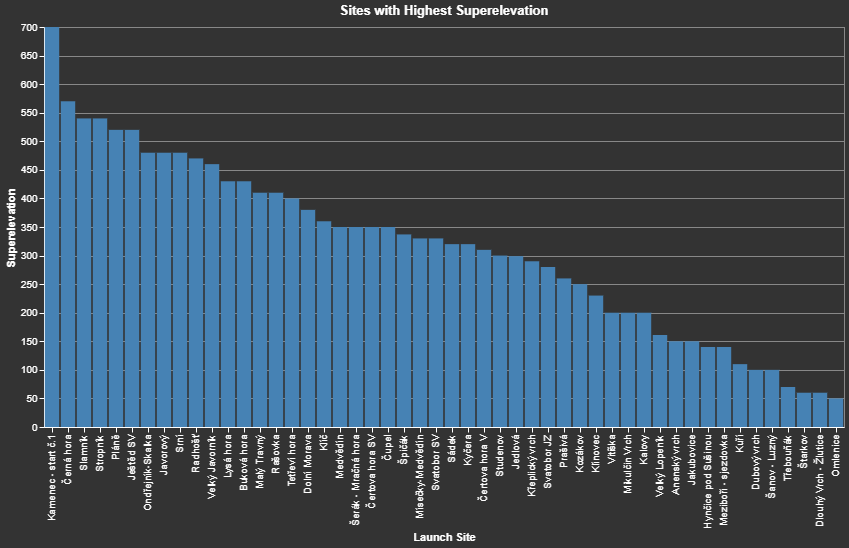

In [8]:
query = """
SELECT
    name,
    superelevation
FROM source.launches
WHERE active
ORDER BY altitude DESC
LIMIT 50
"""
df = pd.read_sql(query, engine)
barchart = alt.Chart(df).mark_bar(color='steelblue').encode(
    x=alt.X('name:N', sort=alt.EncodingSortField(field='superelevation', order='descending'), title='Launch Site'),
    y=alt.Y('superelevation:Q', title='Superelevation'),
    tooltip=['name:N', 'superelevation:Q']
).properties(
    width=800,
    height=400,
    title='Sites with Highest Superelevation'
)
barchart.show()